In [1]:
#importing the libraries for matrix and dataframe handling, plotting, etc 
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#miscellaneous libraries used
import re
import itertools
from collections import Counter
from sys import maxsize
import math
import warnings
warnings.filterwarnings("ignore")

#importing the NLP and Data Visualisation related libraries
import string
from string import ascii_letters, punctuation, digits
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

# Loading Dataset From Kaggle 

In [2]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

Found existing installation: kaggle 1.5.12
Uninstalling kaggle-1.5.12:
  Successfully uninstalled kaggle-1.5.12
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 27.8 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72858 sha256=ef6d50bd0b156bb7b898c6bc0c828539a87d17c8cafcbc31a84a35f8d69d3e7d
  Stored in directory: /root/.cache/pip/wheels/aa/e7/e7/eb3c3d514c33294d77ddd5a856bdd58dc9c1fabbed59a02a2b
Successfully built kaggle


In [3]:
os.environ['KAGGLE_USERNAME'] = "YOUR_KAGGLE_USERNAME" # username from the json file
os.environ['KAGGLE_KEY'] = "YOUR_KAGGLE_KEY" # Provide your key from the json file
!kaggle datasets download -d saurabhshahane/ecommerce-text-classification

 64% 5.00M/7.86M [00:00<00:00, 8.98MB/s]
100% 7.86M/7.86M [00:00<00:00, 13.9MB/s]


In [4]:
from zipfile import ZipFile

file_name = "/content/ecommerce-text-classification.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [5]:
dataset = pd.read_csv('ecommerceDataset.csv', header = None)
dataset.columns = ['labels', 'text']
dataset.head(15)

,labels,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
5,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
6,Household,Paper Plane Design Starry Night Vangoh Wall Ar...
7,Household,Pitaara Box Romantic Venice Canvas Painting 6m...
8,Household,SAF 'Ganesh Modern Art Print' Painting (Synthe...
9,Household,Paintings Villa UV Textured Modern Art Print F...


In [6]:
dataset.shape

(50425, 2)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  50425 non-null  object
 1   text    50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


droping NAN values

In [8]:
print(dataset.isna().sum())
dataset = dataset.dropna()

labels    0
text      1
dtype: int64


Only 'text' column has important information which will be used for classification

In [9]:
#dropping the datapoints with duplicate descriptions
dataset = dataset.drop_duplicates("text",keep='first', inplace=False, ignore_index=True)
dataset = dataset.reset_index(drop=True)
dataset

,labels,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
27797,Electronics,Micromax Bharat 5 Plus Zero impact on visual d...
27798,Electronics,Microsoft Lumia 550 8GB 4G Black Microsoft lum...
27799,Electronics,"Microsoft Lumia 535 (Black, 8GB) Colour:Black ..."
27800,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...


# Visualizing dataset

# Line Graph of Category vs No. Data Points

In [10]:
#Creating a temporary Dataframe 
temp_df = dataset.copy(deep=True)

#creating a list of all the unique category names
category_df = list(dict.fromkeys(list(temp_df.loc[:, 'labels'].values)))

category_keys = [] #corresponds to the unique category names
category_freq = [] #corresponds to the count of the product for a category

for category in category_df:
  #getting the count for that category
  count = np.sum(temp_df.loc[:, 'labels'].values == category)
  if count>=10:
    category_keys.append(category)
    category_freq.append(count)

In [11]:
max_count = max(category_freq)
idx = category_freq.index(max_count)
print("The category having maximum data points is {} with {} data points".format(category_keys[idx],max_count))

The category having maximum data points is Household with 10564 data points


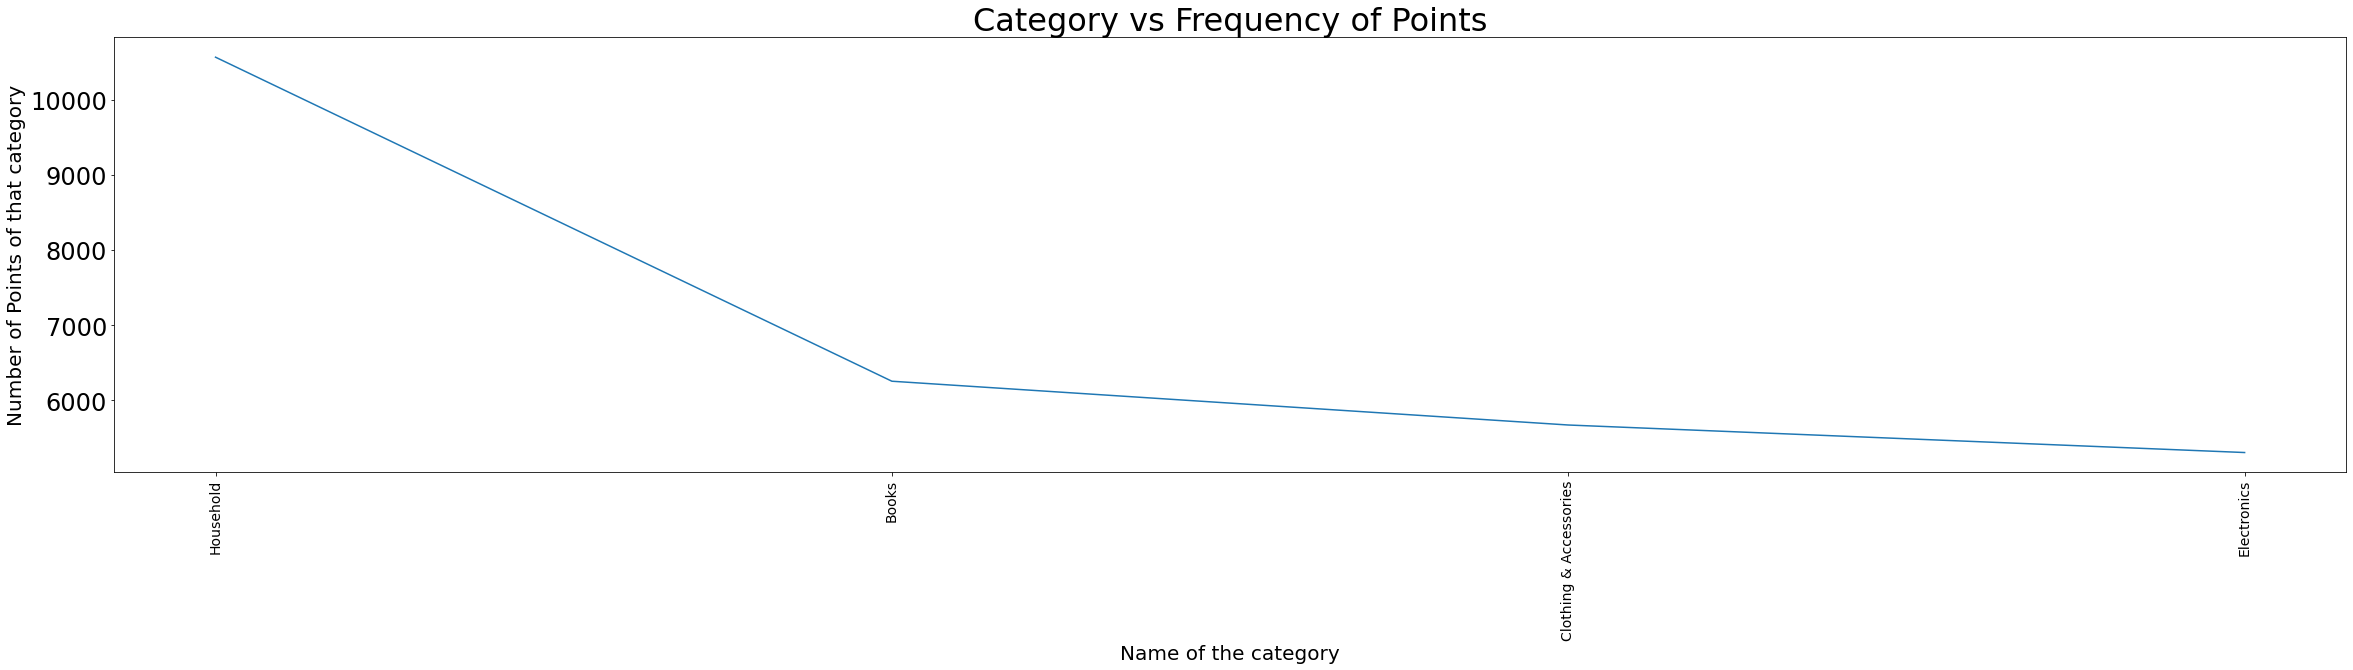

In [12]:
plt.figure(figsize=(40,8))
plt.title("Category vs Frequency of Points", fontsize=32)
plt.ylabel("Number of Points of that category", fontsize=20)
plt.xlabel("Name of the category", fontsize=20)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=24)
sns.lineplot(x=category_keys, y=category_freq)
plt.show()

# Bar graph of most common words in the text description

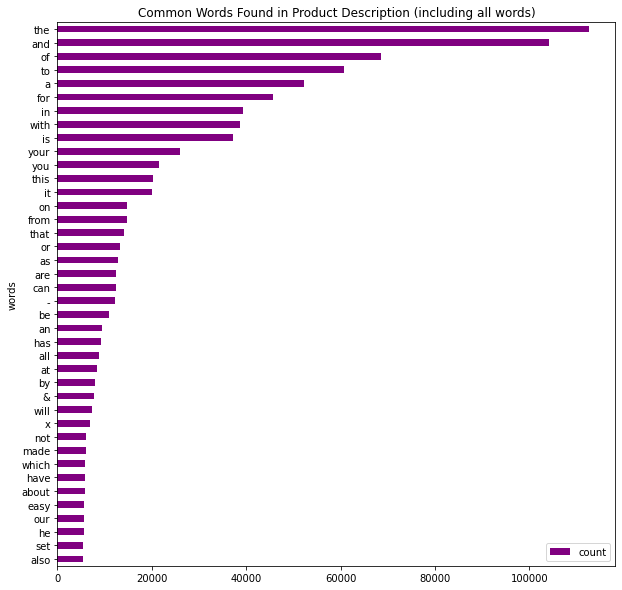

In [13]:
def most_frequent_words(description):

  for i in range(len(description)):
    description[i] = description[i].lower().split()

  all_words = list(itertools.chain(*description))
  word_counts = Counter(all_words)

  #creating a pandas dataframe of the 40 most common words in the dataset
  clean_description = pd.DataFrame(word_counts.most_common(40),
                                    columns=['words', 'count'])

  return clean_description

description = dataset["text"].tolist()
most_common_description = most_frequent_words(description)

fig, ax = plt.subplots(figsize=(10, 10))
# plotting the bargraph in decreasing sorted order
most_common_description.sort_values(by='count').plot.barh(x='words',
                                                          y='count',
                                                          ax=ax,
                                                          color="purple")

ax.set_title("Common Words Found in Product Description (including all words)")
plt.show()

# Sentiment Analysis

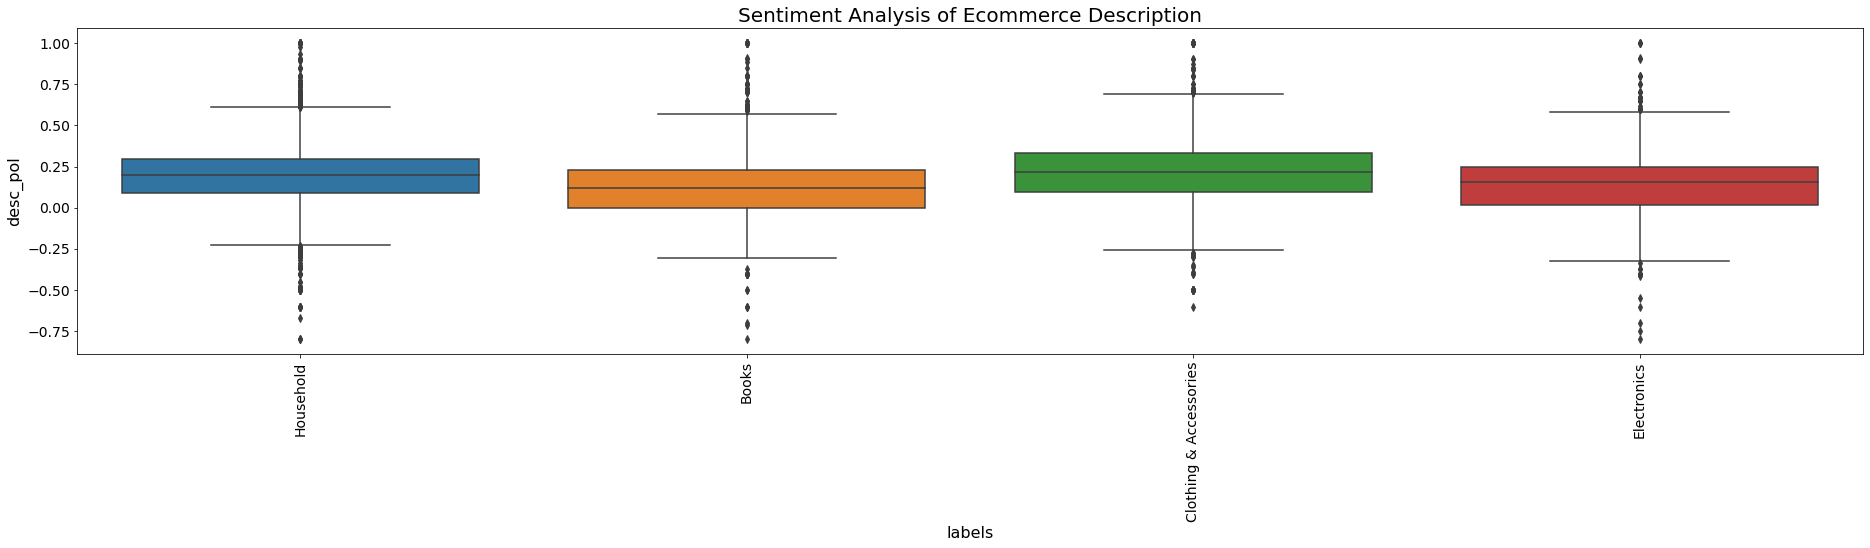

In [14]:
dataset['desc_pol']=dataset['text'].apply(lambda x : TextBlob(x).sentiment.polarity)

plt.figure(figsize=(32,6))
plt.title("Sentiment Analysis of Ecommerce Description", fontsize=20)
plt.xlabel("Polarity", fontsize=16)
plt.ylabel("Ecommerce Description", fontsize=16)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
sns.boxplot(x="labels", y='desc_pol', data=dataset)

# Text Length Analysis

In [15]:
#finding the length of the description
max_desc_len = -1
desc_len_sum = 0
min_desc_len = maxsize

category_description = dataset["text"].tolist()

for i in range(len(category_description)):
  try:
    max_desc_len = max(max_desc_len,len(category_description[i]))
    min_desc_len = min(min_desc_len,len(category_description[i]))
    desc_len_sum+=len(category_description[i])
  except:
    pass

print("Max description length is {}.".format(max_desc_len))
print("Min description length is {}.".format(min_desc_len))
print("Average description length is {}.".format(desc_len_sum/len(category_description)))

Max description length is 50403.
Min description length is 4.
Average description length is 699.9949284224157.


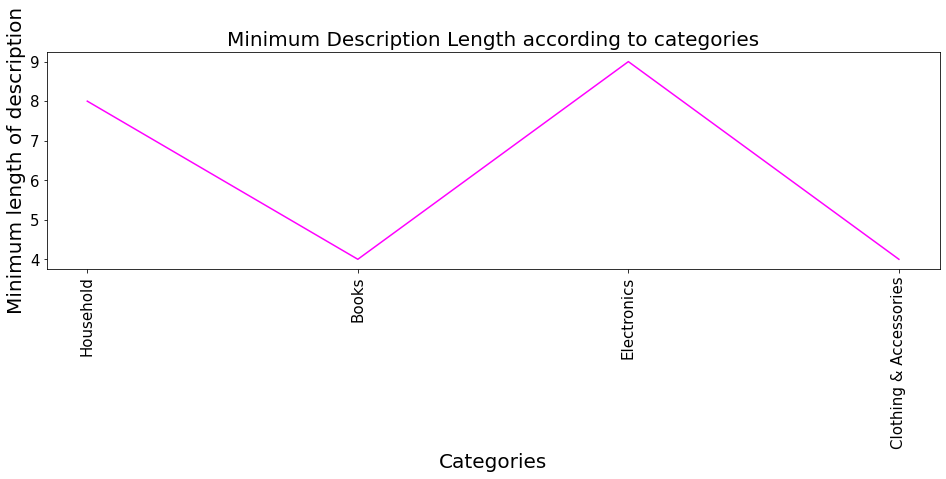

In [16]:
min_len = []
x = []
temp_categories = ["Household", "Books", "Electronics", "Clothing & Accessories"]

for category in temp_categories:
  temp_df = dataset[dataset["labels"]==category]
  try:
    temp_min_len = min(temp_df["text"].str.len())
    x.append(category)
    min_len.append(temp_min_len)
  except:
    pass
  

plt.figure(figsize=(16,4))
plt.title("Minimum Description Length according to categories", fontsize=20)
plt.ylabel("Minimum length of description", fontsize=20)
plt.xlabel("Categories", fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.plot(x,min_len, color = "magenta")

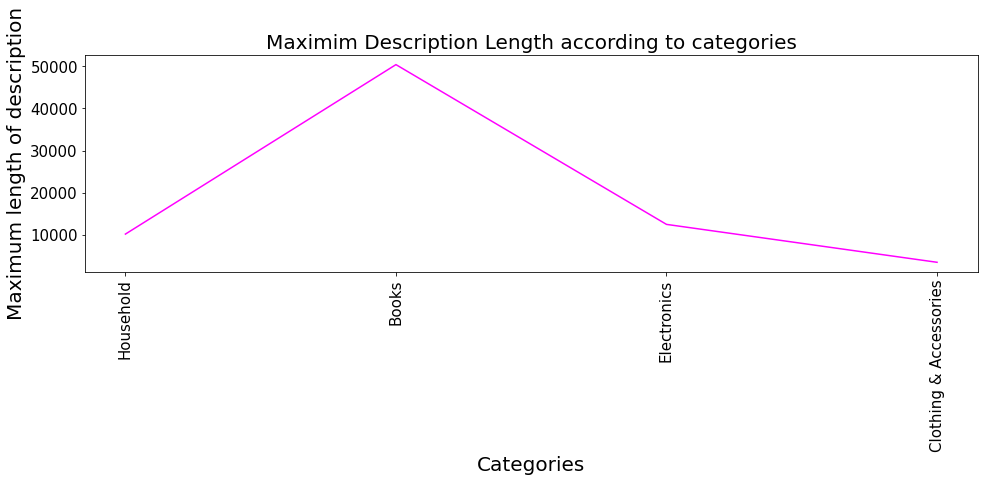

In [17]:
max_len = []
x = []

for category in temp_categories:
  temp_df = dataset[dataset["labels"]==category]
  try:
    temp_max_len = max(temp_df["text"].str.len())
    x.append(category)
    max_len.append(temp_max_len)
  except:
    pass
  

plt.figure(figsize=(16,4))
plt.title("Maximim Description Length according to categories", fontsize=20)
plt.ylabel("Maximum length of description", fontsize=20)
plt.xlabel("Categories", fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.plot(x,max_len, color = "magenta")

Visualizing boxplot for description lengths of different categories to get idea about the average length and the outliers

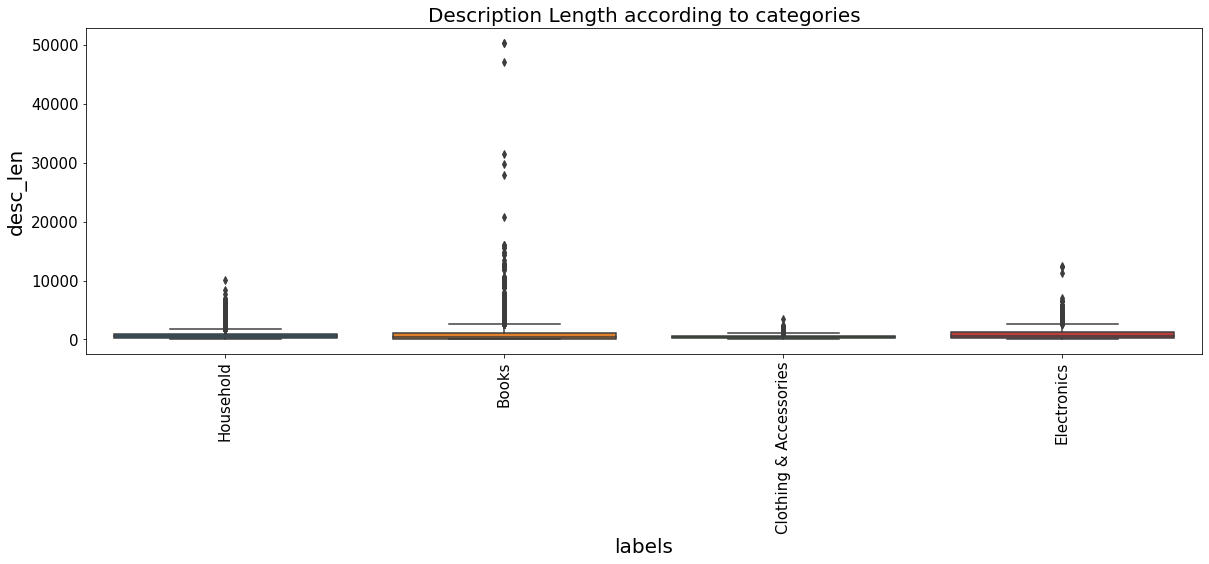

In [18]:
dataset["desc_len"] = dataset["text"].str.len()

plt.figure(figsize=(20,6))
plt.title("Description Length according to categories", fontsize=20)
plt.ylabel("Average of length of description", fontsize=20)
plt.xlabel("Number of Categories", fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
sns.boxplot(x="labels", y='desc_len', data=dataset)

# Data Cleaning anf Pre-Processing

remvoing hyperlinks, numbers and punctuations and lowercasing

In [19]:
corpus = ' '.join(dataset['text']).lower()

# getting all the words ending an apostrophe and single letter
contractions = Counter(re.findall("[a-z]+'[a-z]+", corpus))
apostrophe_end = sorted(contractions.items(), key=lambda i: i[1], reverse=True)
print("\n")
print(apostrophe_end)

# getting all the words starting with a single letter and an apostrophe
contractions=Counter(re.findall("[a-z]'[a-z]+", corpus))
apostrophe_start = sorted(contractions.items(), key=lambda i: i[1], reverse=True)
print("\n")
print(apostrophe_start)

#getting all the URLS
urls = re.findall('\(*http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))*', corpus)
print("\n")
print(urls)



[("women's", 1837), ("men's", 1470), ("it's", 1331), ("don't", 610), ("you're", 358), ("you'll", 314), ("world's", 277), ("won't", 256), ("girl's", 249), ("that's", 233), ("boy's", 204), ("doesn't", 178), ("india's", 161), ("children's", 142), ("what's", 141), ("can't", 136), ("there's", 134), ("he's", 101), ("i've", 98), ("they're", 95), ("you've", 94), ("today's", 91), ("one's", 86), ("i'm", 85), ("kid's", 82), ("we've", 80), ("isn't", 69), ("baby's", 66), ("child's", 61), ("woman's", 49), ("valentine's", 48), ("author's", 45), ("mamma's", 44), ("we're", 42), ("master's", 42), ("people's", 40), ("gay's", 40), ("camera's", 39), ("monitor's", 38), ("father's", 36), ("man's", 36), ("she's", 34), ("didn't", 33), ("item's", 33), ("manufacturer's", 33), ("america's", 33), ("aren't", 32), ("mother's", 32), ("here's", 32), ("china's", 32), ("let's", 31), ("life's", 31), ("chef's", 30), ("book's", 29), ("night's", 28), ("you'd", 27), ("phone's", 26), ("user's", 25), ("i'd", 25), ("kahneman'

In [20]:
custom_contracts = {
    "women's" : "women",
    "men's" : "men",
    "girl's" : "girl",
    "boy's" : "boy",
    "don't" : "do not",
    "product's" : "product",
    "it's" : "its",
    "bra's" : "bras",
    "won't": "will not",
    "doesn't" : "does not",
    "l's" : " ",
    "n's" : " ",
    "y's" : " ",
    "n't" : "not",
    "r's" : "rs",
    "u're" : "your",
    "a's" : " ",
    "e's": " "
}

custom_stopwords = [w for w in set(stopwords.words("english"))]
custom_stopwords += list(punctuation)
stopwords_dataset = ["will","use","made","cash", "rs", "india","details", "guarantee","free", "genuine"]
custom_stopwords.extend(stopwords_dataset)
wordnet_lemmatizer = WordNetLemmatizer()

In [21]:
def clean(text):

  for i in range(len(text)):
    text[i] = text[i].lower()
    text[i] = text[i].replace("\n"," ")
    for keys,values in custom_contracts.items():
      text[i] = text[i].replace(keys,values)
    text[i] = re.sub("[a-z]'[a-z]+", " ", text[i])
    #removing the extra whitespaces
    text[i] = re.sub(' +', ' ', text[i])
    #keeping only the ascii characters -> handles emoticons, letters from other languages, etc
    text[i] = re.sub(r'[^\x00-\x7F]+',' ', text[i])
    #removing the urls
    text[i] = re.sub('[(]?http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F])/)*', ' ', text[i])
    text[i] = ''.join([j for j in text[i] if not j.isdigit()])
    text[i] = text[i].split()
    text[i] = ' '.join([word for word in text[i] if word not in custom_stopwords])
    #removing the punctuations
    text[i] = re.sub(r'[^\w\s]', '', text[i])
    #lemmatization
    text[i] = [wordnet_lemmatizer.lemmatize(w) for w in word_tokenize(text[i])]
    #removing the words which have a length less than 3
    text[i] = [word for word in text[i] if len(word)>=3]
  
  return text

raw_description = dataset["text"].tolist()
cleaned_description = clean(raw_description)
print(cleaned_description[:5])

[['paper', 'plane', 'design', 'framed', 'wall', 'hanging', 'motivational', 'office', 'decor', 'art', 'print', 'inch', 'set', 'painting', 'synthetic', 'frame', 'textured', 'print', 'give', 'multi', 'effect', 'attracts', 'towards', 'special', 'series', 'painting', 'make', 'wall', 'beautiful', 'give', 'royal', 'touch', 'painting', 'ready', 'hang', 'would', 'proud', 'posse', 'unique', 'painting', 'niche', 'apart', 'modern', 'efficient', 'printing', 'technology', 'print', 'ink', 'precision', 'epson', 'roland', 'printer', 'innovative', 'printing', 'technique', 'result', 'durable', 'spectacular', 'looking', 'print', 'highest', 'last', 'lifetime', 'print', 'solely', 'topnotch', 'ink', 'achieve', 'brilliant', 'true', 'colour', 'due', 'high', 'level', 'resistance', 'print', 'retain', 'beautiful', 'colour', 'many', 'year', 'add', 'colour', 'style', 'living', 'space', 'digitally', 'printed', 'painting', 'pleasure', 'eternal', 'blissso', 'bring', 'home', 'elegant', 'print', 'lushed', 'rich', 'color

# Visualizing cleaned dataset

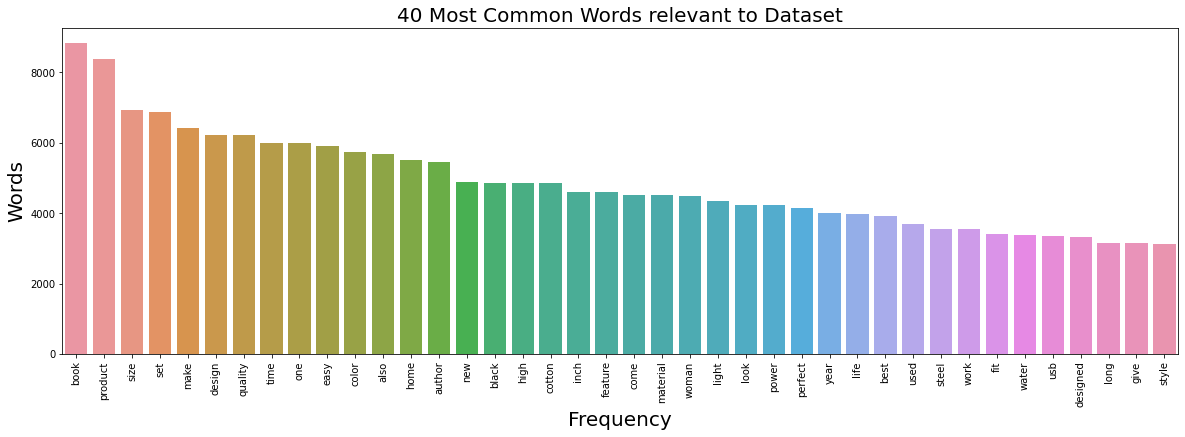

In [22]:
corpus = []
for text in cleaned_description:
  for word in text:
    corpus.append(word)

counter = Counter(corpus)
most=counter.most_common()
x, y = [], []
for word,count in most[:40]:
  if (word not in custom_stopwords):
    x.append(word)
    y.append(count)

plt.figure(figsize=(20,6))
plt.title("40 Most Common Words relevant to Dataset", fontsize=20)
plt.ylabel("Words", fontsize=20)
plt.xlabel("Frequency", fontsize=20)
plt.xticks(rotation=90)            
sns.barplot(x=x,y=y)

In [23]:
temp_cleaned_description = [" ".join(sentence) for sentence in cleaned_description]
dataset["cleaned_desc"] = temp_cleaned_description
dataset.head(10)

,labels,text,desc_pol,desc_len,cleaned_desc
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,0.351267,1338,paper plane design framed wall hanging motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0.614286,346,saf floral framed painting wood inch inch spec...
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,0.283824,1316,saf textured modern art print framed painting ...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",0.303571,1091,saf flower print framed painting synthetic inc...
4,Household,Incredible Gifts India Wooden Happy Birthday U...,0.299066,989,incredible gift wooden happy birthday unique p...
5,Household,Pitaara Box Romantic Venice Canvas Painting 6m...,0.245221,1745,pitaara box romantic venice canvas painting th...
6,Household,Paper Plane Design Starry Night Vangoh Wall Ar...,0.343841,1625,paper plane design starry night vangoh wall ar...
7,Household,SAF 'Ganesh Modern Art Print' Painting (Synthe...,0.283824,1169,saf ganesh modern art print painting synthetic...
8,Household,Paintings Villa UV Textured Modern Art Print F...,0.455333,616,painting villa textured modern art print frame...
9,Household,Painting Mantra Art Street - Jardin Bird Frame...,0.053052,400,painting mantra art street jardin bird framed ...


# Visualizing overlapping classes with TSNE Plots

reduces dimention to 2 to help in visualization

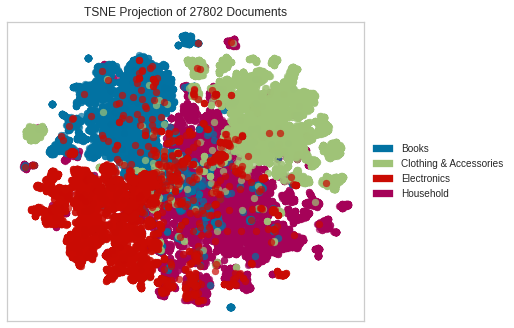

In [24]:
from yellowbrick.text import TSNEVisualizer

# creating the document vectors
tfidf = TfidfVectorizer()

description = tfidf.fit_transform(dataset["cleaned_desc"])
categories_ = dataset["labels"]

# creating the visualizer
tsne = TSNEVisualizer()
tsne.fit_transform(description, categories_)
tsne.poof()
plt.show()

# Creating Balanced Dataset

In [25]:
# a copy of the unbalanced dataset is made on which further work is done
balanced_df = dataset.copy(deep=True)
balanced2_df = dataset.copy(deep=True)
balanced_df

,labels,text,desc_pol,desc_len,cleaned_desc
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,0.351267,1338,paper plane design framed wall hanging motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0.614286,346,saf floral framed painting wood inch inch spec...
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,0.283824,1316,saf textured modern art print framed painting ...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",0.303571,1091,saf flower print framed painting synthetic inc...
4,Household,Incredible Gifts India Wooden Happy Birthday U...,0.299066,989,incredible gift wooden happy birthday unique p...
...,...,...,...,...,...
27797,Electronics,Micromax Bharat 5 Plus Zero impact on visual d...,0.000000,144,micromax bharat plus zero impact visual displa...
27798,Electronics,Microsoft Lumia 550 8GB 4G Black Microsoft lum...,0.325496,1924,microsoft lumia black microsoft lumia experien...
27799,Electronics,"Microsoft Lumia 535 (Black, 8GB) Colour:Black ...",0.291555,3931,microsoft lumia black colourblack product desc...
27800,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...,0.309242,1653,karbonn titanium wind white karbonn titanium w...


In [26]:
from sklearn.utils import resample

final_balanced_df = {category: balanced_df[balanced_df['labels']==category] for category in set(balanced_df['labels'])}

train_df = pd.concat([resample(data, n_samples=3000, replace=True, random_state=42) for data in final_balanced_df.values()])
train_df

,labels,text,desc_pol,desc_len,cleaned_desc
23354,Electronics,Nanya 4GB DDR3 Memory SO-DIMM 204pin PC3-12800...,0.000000,150,nanya ddr memory sodimm pin mhz nanya ram ddr ...
27720,Electronics,"M-fit Replacement Strap for M2, Band 2, HRX (B...",0.240741,984,mfit replacement strap band hrx black substitu...
27685,Electronics,Beetel M71 CLI Corded Phone (Black) Although m...,0.192965,1929,beetel cli corded phone black although mobile ...
26266,Electronics,Five Point Someone About the Author Chetan Bha...,0.224905,1207,five point someone author chetan bhagat author...
25586,Electronics,"ARM Premium Microfiber Cleaning Cloths, (PACK ...",0.186379,1871,arm premium microfiber cleaning cloth pack ran...
...,...,...,...,...,...
6588,Household,"Amefa Charon Stainless Steel Cutlery Set, 24-P...",0.216667,530,amefa charon stainless steel cutlery set piece...
3311,Household,Reliable Cotton Trends Fitted Bedsheets (Purpl...,0.329924,346,reliable cotton trend fitted bedsheets purple ...
6048,Household,Pigeon Gas Lighter with Free Knife (Set of 2) ...,0.400000,123,pigeon gas lighter knife set pigeon gas lighte...
6246,Household,ORPIO (LABEL) New Heavy Stainless Steel Manual...,0.233117,425,orpio label new heavy stainless steel manual p...


In [29]:
temp_balanced_categories = {
    'primary_category':[],
    'count':[]
}

categories = ["Household", "Books", "Electronics", "Clothing & Accessories"]


for category in categories:
  count = np.sum(train_df.loc[:, 'labels'].values == category)
  temp_balanced_categories['primary_category'].append(category)
  temp_balanced_categories['count'].append(count)

category_balanced_df = pd.DataFrame(temp_balanced_categories)
category_balanced_df = category_balanced_df.sort_values(by = 'count', ascending=False)
category_balanced_df = category_balanced_df.reset_index(drop=True)
category_balanced_df

,primary_category,count
0,Household,3000
1,Books,3000
2,Electronics,3000
3,Clothing & Accessories,3000


In [30]:
balanced_df = train_df

balanced_df2 = train_df

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#  MACHINE LEARNING ALGORITHMS

In [31]:
#helper dictionaries created which are later used to manipulate the testing output into suitable form before plotting the ROC Curves

category_mapping = {  0	: "Household",
                      1	: "Books",
                      2	: "Electronics",
                      3	: "Clothing & Accessories"}

reverse_category_mapping = {"Household":0,
                            "Books":1,
                            "Electronics":2,
                            "Clothing & Accessories":3}


1. Splitting dataset to training and testing
2. Creating Bag of Words Model for the training dataset and converting these to corresponding TF vectors (for better performance)

# 1. Logistic Regression (Binary Classification)

In [32]:
def logistic_regression(x,y):
  from sklearn.linear_model import LogisticRegression

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  #fitting the training dataset to the model
  lr_model = LogisticRegression()
  lr_model.fit(x_train,y_train)
  lr_predict = lr_model.predict(x_test)
  lr_pred_prob = lr_model.predict_proba(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, lr_predict))

  print("\n")
  print("*********** CONFUSION MATRIX **************")
  print(confusion_matrix(y_test,lr_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test,lr_predict))

  return y_test, lr_predict, lr_pred_prob

# 2. Logistic Regression (Multiclass Classification)

In [33]:
def logistic_regression_multiclass(x,y):
  from sklearn.linear_model import LogisticRegression

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  reg = 0.1

  #fitting the training dataset to the multiclass classification Logistic Regression model
  lr_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=1000).fit(x_train,y_train)
  lr_predict = lr_model.predict(x_test)
  lr_pred_prob = lr_model.predict_proba(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, lr_predict))

  print("\n")
  print("*********** CONFUSION MATRIX **************")
  print(confusion_matrix(y_test,lr_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test,lr_predict))

  return y_test, lr_predict, lr_pred_prob

# 3. Multinomial Naive Bayes CLassifier

In [34]:
def naive_bayes(x,y):
  from sklearn.naive_bayes import MultinomialNB

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  #fitting the tarining dataset to the model
  nb_model = MultinomialNB()
  nb_model.fit(x_train,y_train)
  nb_predict = nb_model.predict(x_test)
  nb_pred_prob = nb_model.predict_proba(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, nb_predict))

  print("\n")
  print("*********** CONFUSION MATRIX **************")
  print(confusion_matrix(y_test,nb_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test,nb_predict))

  return y_test, nb_predict, nb_pred_prob

# 4. Linear Support Vector Machine

In [35]:
def linear_svm(x,y):
  from sklearn.svm import LinearSVC

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  #fitting the training dataset to the model
  svc_model = LinearSVC(random_state=42, max_iter=2000)
  svc_model.fit(x_train,y_train)
  svc_predict = svc_model.predict(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, svc_predict))

  print("\n")
  print("*********** CONFUSION MATRIX **************")
  print(confusion_matrix(y_test,svc_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test,svc_predict))

  return y_test, svc_predict

# 5. Decision TTree Classifier

In [36]:
def decision_trees(x,y):
  from sklearn.tree import DecisionTreeClassifier

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  #fitting the training dataset to the model
  dtree_model = DecisionTreeClassifier(max_depth = 30)
  dtree_model.fit(x_train,y_train)
  dtree_predict = dtree_model.predict(x_test)
  dtree_pred_prob = dtree_model.predict_proba(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, dtree_predict))

  print("\n")
  print("*********** CONFUSION MATRIX **************")
  print(confusion_matrix(y_test,dtree_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test,dtree_predict))

  return y_test, dtree_predict, dtree_pred_prob

# 6. Random Forest Classifier

In [37]:
def random_forest(x,y):
  from sklearn.ensemble import RandomForestClassifier

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  #fitting the training dataset to the model
  rfc_model = RandomForestClassifier(random_state=42, max_depth = 30)
  rfc_model.fit(x_train,y_train)
  rfc_predict = rfc_model.predict(x_test)
  rfc_pred_prob = rfc_model.predict_proba(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, rfc_predict))

  print("\n")
  print("*********** CONFUSION MATRIX **************")
  print(confusion_matrix(y_test, rfc_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test, rfc_predict))

  return y_test, rfc_predict, rfc_pred_prob

# 7. K Nearest Neighbours

In [38]:
def k_nearest_neighbours(x,y):
  from sklearn.neighbors import KNeighborsClassifier

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  #fitting the training dataset to the model
  knn_model = KNeighborsClassifier(algorithm='brute')
  knn_model.fit(x_train,y_train)
  knn_predict = knn_model.predict(x_test)
  knn_pred_prob = knn_model.predict_proba(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, knn_predict))

  print("\n")
  print("*********** CONFUSION MATRIX **************")
  print(confusion_matrix(y_test, knn_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test, knn_predict))

  return y_test, knn_predict, knn_pred_prob

## Evaluation of models

In [39]:
# the cleaned product description corresponds to the x value 
x = balanced_df2['cleaned_desc']
# the 13 labels/ product categories mentioned above correspond to the y value
y = balanced_df2['labels']

1. Evaluating using Logistic Regression

In [45]:
print("********** LOGISTIC REGRESSION **********")
y_test, lr_predict, lr_pred_prob = logistic_regression(x,y)

********** LOGISTIC REGRESSION **********
Validation Accuracy:  0.9258333333333333


*********** CONFUSION MATRIX **************
[[499  18  16  35]
 [  1 610   6   7]
 [  6   5 580  21]
 [  6  28  29 533]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

                 Books       0.97      0.88      0.92       568
Clothing & Accessories       0.92      0.98      0.95       624
           Electronics       0.92      0.95      0.93       612
             Household       0.89      0.89      0.89       596

              accuracy                           0.93      2400
             macro avg       0.93      0.92      0.93      2400
          weighted avg       0.93      0.93      0.93      2400



2. Evaluating using Multiclass variant of Logistic Regression

In [46]:
print("********** MULTICLASS LOGISTIC REGRESSION **********")
y_test, lr_predict, lr_pred_prob = logistic_regression_multiclass(x,y)

********** MULTICLASS LOGISTIC REGRESSION **********
Validation Accuracy:  0.935


*********** CONFUSION MATRIX **************
[[501  20  16  31]
 [  0 616   4   4]
 [  5   3 590  14]
 [  5  28  26 537]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

                 Books       0.98      0.88      0.93       568
Clothing & Accessories       0.92      0.99      0.95       624
           Electronics       0.93      0.96      0.95       612
             Household       0.92      0.90      0.91       596

              accuracy                           0.94      2400
             macro avg       0.94      0.93      0.93      2400
          weighted avg       0.94      0.94      0.93      2400



3. Evaluating using Multiclass Naive Bayes Classifier

In [47]:
print("********* NAIVE BAYES CLASSIFIER *********")
y_test, nb_predict, nb_pred_prob = naive_bayes(x,y)

********* NAIVE BAYES CLASSIFIER *********
Validation Accuracy:  0.9316666666666666


*********** CONFUSION MATRIX **************
[[504  13  18  33]
 [  1 606   6  11]
 [  7   2 580  23]
 [  9  16  25 546]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

                 Books       0.97      0.89      0.93       568
Clothing & Accessories       0.95      0.97      0.96       624
           Electronics       0.92      0.95      0.93       612
             Household       0.89      0.92      0.90       596

              accuracy                           0.93      2400
             macro avg       0.93      0.93      0.93      2400
          weighted avg       0.93      0.93      0.93      2400



4. Evaluating using Linear support vector machines

In [48]:
print("********* LINEAR SVM *********")
y_test, svm_predict = linear_svm(x,y)

********* LINEAR SVM *********
Validation Accuracy:  0.94375


*********** CONFUSION MATRIX **************
[[507  18  17  26]
 [  0 616   3   5]
 [  6   2 590  14]
 [  5  21  18 552]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

                 Books       0.98      0.89      0.93       568
Clothing & Accessories       0.94      0.99      0.96       624
           Electronics       0.94      0.96      0.95       612
             Household       0.92      0.93      0.93       596

              accuracy                           0.94      2400
             macro avg       0.95      0.94      0.94      2400
          weighted avg       0.94      0.94      0.94      2400



5. Evaluating using Decision Tree Classifer

In [49]:
print("********** DECISION TREES CLASSIFIER *************")
y_test, dtree_predict, dtree_pred_prob = decision_trees(x,y)

********** DECISION TREES CLASSIFIER *************
Validation Accuracy:  0.7870833333333334


*********** CONFUSION MATRIX **************
[[505   7  16  40]
 [ 39 542  11  32]
 [ 60   7 438 107]
 [104  19  69 404]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

                 Books       0.71      0.89      0.79       568
Clothing & Accessories       0.94      0.87      0.90       624
           Electronics       0.82      0.72      0.76       612
             Household       0.69      0.68      0.69       596

              accuracy                           0.79      2400
             macro avg       0.79      0.79      0.79      2400
          weighted avg       0.80      0.79      0.79      2400



6. Evaluating using Random Forest Classifier

In [50]:
print("********** RANDOM FOREST CLASSIFIER *************")
y_test, rfc_predict, rfc_pred_prob = random_forest(x,y)

********** RANDOM FOREST CLASSIFIER *************
Validation Accuracy:  0.9108333333333334


*********** CONFUSION MATRIX **************
[[524  14   8  22]
 [ 10 604   3   7]
 [ 26   3 546  37]
 [ 31  35  18 512]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

                 Books       0.89      0.92      0.90       568
Clothing & Accessories       0.92      0.97      0.94       624
           Electronics       0.95      0.89      0.92       612
             Household       0.89      0.86      0.87       596

              accuracy                           0.91      2400
             macro avg       0.91      0.91      0.91      2400
          weighted avg       0.91      0.91      0.91      2400



7. Evaluating using K nearest Neighbours

In [51]:
print("********** K NEAREST NEIGHBOURS *************")
y_test, knn_predict, knn_pred_prob = k_nearest_neighbours(x,y)

********** K NEAREST NEIGHBOURS *************
Validation Accuracy:  0.9229166666666667


*********** CONFUSION MATRIX **************
[[512  15  18  23]
 [  1 613   4   6]
 [ 12   6 568  26]
 [ 21  21  32 522]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

                 Books       0.94      0.90      0.92       568
Clothing & Accessories       0.94      0.98      0.96       624
           Electronics       0.91      0.93      0.92       612
             Household       0.90      0.88      0.89       596

              accuracy                           0.92      2400
             macro avg       0.92      0.92      0.92      2400
          weighted avg       0.92      0.92      0.92      2400



# Prediction using BERT

In [52]:
!pip install torch==1.7.1
!pip install transformers
!pip install simpletransformers
!pip install tensorboardx
!pip install pytorch-nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.8/776.8 MB 2.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.13.1+cu113 requires torch==1.12.1, but you have torch 1.7.1 which is incompatible.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.7.1 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.7.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [53]:
print(balanced_df.shape)
print(Counter(balanced_df['labels']))

(12000, 5)
Counter({'Electronics': 3000, 'Clothing & Accessories': 3000, 'Books': 3000, 'Household': 3000})


In [54]:
#splitting the dataframe into test and training dataframe
from sklearn.model_selection import train_test_split

balanced_df, test_df = train_test_split(balanced_df, test_size=0.1, random_state = 2018)
print(balanced_df.shape, test_df.shape)

(10800, 5) (1200, 5)


In [55]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


Encoding using LabelEncoder

In [56]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
balanced_df['labels']=encoder.fit_transform(balanced_df['labels'])
print(Counter(balanced_df['labels']))

prediction_decoded = encoder.inverse_transform(balanced_df['labels'])
print(Counter(prediction_decoded))

Counter({3: 2712, 0: 2703, 1: 2693, 2: 2692})
Counter({'Household': 2712, 'Books': 2703, 'Clothing & Accessories': 2693, 'Electronics': 2692})


In [57]:
#loading the BERT tokenizer
from transformers import BertTokenizer

print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

Loading BERT tokenizer...


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

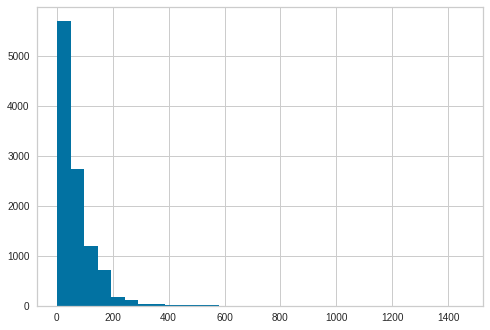

In [58]:
# get an idea about avg length of desriptions as BERT requires input in a particular format
desc = balanced_df["cleaned_desc"].tolist()

seq_len = [len(i.split()) for i in desc]
pd.Series(seq_len).hist(bins = 30)

tokenizer.encode() splits sentences into tokens and adds special tokens at start and end according to the BERT input requirements

In [59]:
#tokenization of all the sentences followed by the mapping of the tokens to their word ids
tokenized_inputs = []
tokenized_len = []
input_data = balanced_df["cleaned_desc"].tolist()

for sentence in input_data:
  '''
    tokenizer.encode does the following:
    1. tokenizes the sentences
    2. adds [CLS] to the start of the tokens and [SEP] to the end of the tokens
    3. Maps the tokens to their word IDS
  '''
  encoded_sentence = tokenizer.encode(sentence, add_special_tokens=True)
  tokenized_inputs.append(encoded_sentence)
  tokenized_len.append(len(encoded_sentence))

balanced_df["Token_ids"] = tokenized_inputs

Token indices sequence length is longer than the specified maximum sequence length for this model (611 > 512). Running this sequence through the model will result in indexing errors


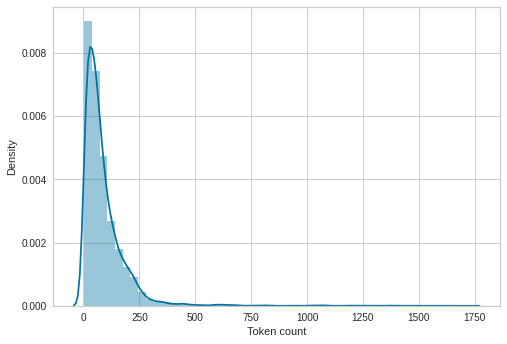

In [60]:
# distribution of token lengths across the corpus

sns.distplot(tokenized_len)
plt.xlabel('Token count');

In [61]:
from keras.preprocessing.sequence import pad_sequences

# from the above, we can see that most of the sentences are below 200 -> choosing a max_len of 128
max_len = 128
#padding and truncating the sentences according to the maximum length
tokenized_inputs = pad_sequences(balanced_df["Token_ids"], maxlen=max_len, dtype="long",value=0, truncating="post", padding="post")

#creating the attention masks
attention_mask = []

for sentence in tokenized_inputs:
  temp_mask = [int(token_id>0) for token_id in sentence]
  attention_mask.append(temp_mask)

Converting to Pytorch tensors, splitting to validation and training dataset

In [62]:
description_inputs = torch.tensor(tokenized_inputs)
category_labels = torch.tensor(balanced_df["labels"].values)
mask = torch.tensor(attention_mask)

print(description_inputs.shape, category_labels.shape, mask.shape)

#splitting the dataset and attention masks
training_dataset, validation_dataset, training_categories, validation_categories = train_test_split(description_inputs, 
                                                                                                    category_labels, 
                                                                                                    random_state = 42, 
                                                                                                    test_size = 0.15,
                                                                                                    shuffle=True)

training_mask, validation_mask, _, _ = train_test_split(mask, 
                                                        category_labels, 
                                                        random_state = 42, 
                                                        test_size = 0.15,
                                                        shuffle=True)

torch.Size([10800, 128]) torch.Size([10800]) torch.Size([10800, 128])


In [63]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#barch size has been chosen to be 16 as a batch size of 32 gave out of memory errors (limitation)
BATCH_SIZE = 16

# creating the dataloader for the training dataset
training_data = TensorDataset(training_dataset, training_mask, training_categories)
training_dataloader = DataLoader(training_data, sampler=RandomSampler(training_data), batch_size=BATCH_SIZE)

# creating the dataloader for the validation dataset
validation_data = TensorDataset(validation_dataset, validation_mask, validation_categories)
validation_dataloader = DataLoader(validation_data, sampler=SequentialSampler(validation_data), batch_size=BATCH_SIZE)

# Training Multiclass Classification model

In [64]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup

# choosing the model version that has only lowercase characters and is the smaller one out the two versions
option_name = "bert-base-uncased"

model = BertForSequenceClassification.from_pretrained(option_name, 
                                                      num_labels = 4, 
                                                      output_attentions = False, 
                                                      output_hidden_states = False)
model.cuda()

#optimzer: object that actually performs updates to our weights
optimizer = AdamW(model.parameters(),
                  lr = 3e-5, 
                  eps = 1e-8)

# number of training epochs
epochs = 4

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [65]:
#HELPER FUNCTIONS

# this function takes time in seconds and returns a string hh:mm:ss
def format_time(elapsed):
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

# this function calculates the accuracy by taking in the predicted and actual labels as parameters
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [66]:
import random
import timeit
import datetime

In [67]:
# ************ TRAINING LOOP ************************

def train_model(model = model,
                optimizer = optimizer,
                train_loader = training_dataloader,
                valid_loader = validation_dataloader,
                num_epochs = epochs,
                eval_every = len(training_dataloader) // 4):
  
  seed_val = 42

  random.seed(seed_val)
  np.random.seed(seed_val)
  torch.manual_seed(seed_val)
  torch.cuda.manual_seed_all(seed_val)

  #initialising the running variables
  train_loss_list = []
  valid_loss_list = []
  running_loss = 0.0
  valid_loss = 0.0

  for each_epoch in range(num_epochs):

    '''
    ****************** TRAINING *******************
    '''

    #performing one full pass of the training set
    print('\n')
    print("*************** Epoch {:}/{:} ***************".format(each_epoch+1,epochs))
    print("Training....")

    #calculating how much running time each epoch takes
    start = timeit.default_timer()
    #resetting the running loss variable
    running_loss = 0.0

    #putting the model into training mode
    model.train()

    for step, (input_desc_ids, input_mask, input_label) in enumerate(train_loader):

      #evaluation of each batch 
      if step%eval_every==0 and step!=0:
        stop = timeit.default_timer()
        #calculating the time elapsed in hh:mm:ss format
        time_elapsed = format_time(stop-start)
        print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_loader), time_elapsed))

      # unpacking the training batch from the data loader and copying the Pytoch tensors to the GPU
      input_desc_ids = input_desc_ids.to(device)
      input_mask = input_mask.to(device)
      input_label = input_label.to(device)
      
      #clearing the previously calculated gradients before performing a backward pass
      model.zero_grad()

      #performing a forward pass on this particular batch of data
      outputs = model(input_desc_ids,
                      token_type_ids=None,
                      attention_mask = input_mask,
                      labels = input_label)

      loss = outputs[0]
      running_loss += loss.item()

      #performing a backward pass to calculate the gradients
      loss.backward()
      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

      #updating the parameters 
      optimizer.step()

    # calculating the average training loss and storing it
    average_train_loss = running_loss / len(train_loader)
    train_loss_list.append(average_train_loss)

    print('\n')
    print("  Average training loss: {0:.2f}".format(average_train_loss))
    print("  Training epoch took: {:}".format(format_time(timeit.default_timer() - start)))


    '''
    ****************** VALIDATION *******************
    '''

    print("\n")
    print("Validating....")

    start = timeit.default_timer()

    model.eval()

    #initialising the tracking variables
    valid_loss = 0.0
    valid_accuracy = 0.0
    steps_eval = 0
    examples_eval = 0

    for (input_ids, input_masks, input_labels) in valid_loader:
      input_ids = input_ids.to(device)
      input_masks = input_masks.to(device)
      input_labels = input_labels.to(device)

      # saves computing requirements by setting requires_grad to False
      with torch.no_grad():
        outputs = model(input_ids, 
                        token_type_ids=None, 
                        attention_mask=input_masks)
      
      logits = outputs[0]

      logits = logits.detach().cpu().numpy()
      label_ids = input_labels.to('cpu').numpy()

      temp_accuracy = flat_accuracy(logits, label_ids)
      valid_accuracy += temp_accuracy
      steps_eval += 1

    average_valid_accuracy = valid_accuracy/steps_eval
    valid_loss_list.append(average_valid_accuracy)

    print("  Accuracy: {0:.2f}".format(average_valid_accuracy))
    print("  Validation took: {:}".format(format_time(timeit.default_timer() - start)))

    return train_loss_list, valid_loss_list

  print("\n")
  print("Training complete!!!")

In [68]:
train_loss_list, valid_loss_list = train_model()



*************** Epoch 1/4 ***************
Training....
  Batch   143  of    574.    Elapsed: 0:00:56.
  Batch   286  of    574.    Elapsed: 0:01:50.
  Batch   429  of    574.    Elapsed: 0:02:45.
  Batch   572  of    574.    Elapsed: 0:03:40.


  Average training loss: 0.34
  Training epoch took: 0:03:40


Validating....
  Accuracy: 0.95
  Validation took: 0:00:13


# Test Data Performance

In [69]:
test_df.sample(10)

,labels,text,desc_pol,desc_len,cleaned_desc
24801,Electronics,Smart Shelter LED/LCD TV Full Motion Floor Mou...,0.121429,285,smart shelter ledlcd full motion floor mountpe...
8474,Household,Nyka-60 Stainless Steel Pyramid Range 3 Speed ...,0.237083,1091,nyka stainless steel pyramid range speed push ...
19976,Clothing & Accessories,BATA Men's Class Formal Shoes Elevate your sty...,0.483333,246,bata men class formal shoe elevate style class...
4788,Household,Outgeek LED Ceiling Light Crystal 220V Flush M...,0.108036,656,outgeek led ceiling light crystal flush mount ...
14030,Books,Strauss Bronx FT Skateboard,0.000000,27,strauss bronx skateboard
16894,Clothing & Accessories,Satyam Kraft PU Leather Adjustable Automatic B...,0.250000,390,satyam kraft leather adjustable automatic belt...
18643,Clothing & Accessories,Jockey Women's Cotton Bikini (Pack of 3) (Colo...,0.266667,209,jockey woman cotton bikini pack color may vary...
11235,Books,An Outline History of English Literature About...,-0.011364,566,outline history english literature author huds...
9437,Household,Casa Decor Silver Rose Turq Ceramic Cupboard C...,0.237963,622,casa decor silver rose turq ceramic cupboard c...
22471,Clothing & Accessories,Vansh Online Shop Women's Cotton Camisole Comb...,0.500000,193,vansh online shop woman cotton camisole combo ...


apply similar encoding on test dataframe as applied on training dataset

In [70]:
test_df['labels']=encoder.fit_transform(test_df['labels'])
print(Counter(test_df['labels']))

prediction_decoded = encoder.inverse_transform(test_df['labels'])
print(Counter(prediction_decoded))

Counter({2: 308, 1: 307, 0: 297, 3: 288})
Counter({'Electronics': 308, 'Clothing & Accessories': 307, 'Books': 297, 'Household': 288})


In [71]:
test_description = test_df["cleaned_desc"].values
test_labels = test_df["labels"].values

In [72]:
#converting into tokens
test_ids = []

for sentence in test_description:
  encoded_sentence = tokenizer.encode(sentence,                      
                                  add_special_tokens = True)
    
  test_ids.append(encoded_sentence)

test_ids = pad_sequences(test_ids, 
                         maxlen=max_len, 
                        dtype="long", 
                        truncating="post", 
                         padding="post")

# creating the attention masks
attention_masks = []

for id in test_ids:
  temp_mask = [int(i>0) for i in id]
  attention_masks.append(temp_mask)

# converting into tensors
prediction_inputs = torch.tensor(test_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(test_labels)

In [73]:
#creating the Pytorch Dataloader
testing_data = TensorDataset(prediction_inputs, 
                                prediction_masks, 
                                prediction_labels)

testing_dataloader = DataLoader(testing_data, 
                                   sampler=SequentialSampler(testing_data), 
                                   batch_size=BATCH_SIZE)

# Evaluation function -> generating predictions

In [74]:
def evaluation(model = model,
               test_loader = testing_dataloader):
  
  print('Predicting labels for {:,} test descriptions'.format(len(testing_data)))

  #initialising the running variables
  predictions = []
  true_categories = []

  #putting the model in avaluation mode
  model.eval()

  for (test_desc_ids, test_mask, test_label) in test_loader:
    
    # adding the batch variables to the GPU
    test_desc_ids = test_desc_ids.to(device)
    test_mask = test_mask.to(device)
    test_label = test_label.to(device)

    with torch.no_grad():
      #forward pass
      #calculating the logit predictions
      outputs = model(test_desc_ids,
                      token_type_ids=None,
                      attention_mask = test_mask)
      
    logits = outputs[0]

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = test_label.to('cpu').numpy()
    
    # Store predictions and true labels
    predictions.extend(list( np.argmax(logits, axis=1).flatten()))
    true_categories.extend(list(label_ids.flatten()))

  print("Evaluation done!!!")

  return true_categories, predictions
  

In [75]:
true_labels, pred_labels = evaluation()

Predicting labels for 1,200 test descriptions
Evaluation done!!!


# Evaluation Metrics

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       297
           1       0.98      0.97      0.97       307
           2       0.95      0.93      0.94       308
           3       0.90      0.95      0.93       288

    accuracy                           0.95      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.95      0.95      0.95      1200



Text(69.0, 0.5, 'True Labels')

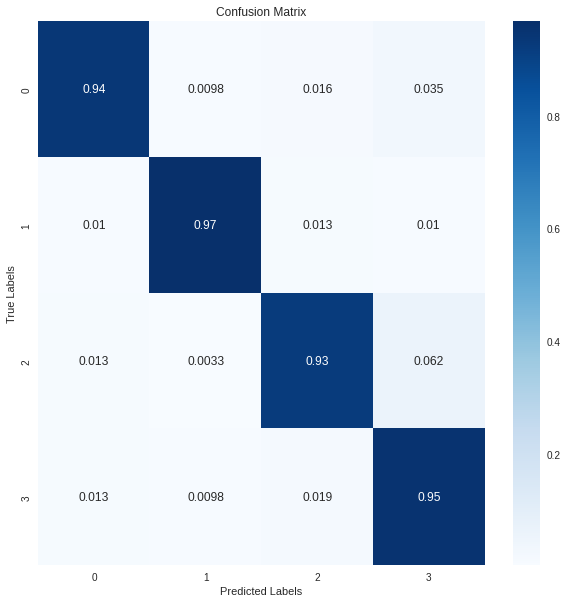

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Classification Report:')
print(classification_report(true_labels, pred_labels))
    
plt.figure(figsize = (10,10))
cm = confusion_matrix(true_labels, pred_labels)
cm = cm / cm.astype(np.float).sum(axis=1)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

# **FINAL ACCURACY ACHIEVED : 94%**